<a href="https://colab.research.google.com/github/Digitall-Ivan/Data_Analytics_course/blob/main/Ivan_Zakorchevnyi_HW1_%D0%92%D1%96%D0%B7%D1%83%D0%B0%D0%BB%D1%96%D0%B7%D0%B0%D1%86%D1%96%D1%8F_%D0%B4%D0%B0%D0%BD%D0%B8%D1%85_%D0%B7_Pandas_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнє завдання: Візуалізація даних з Pandas

## Опис завдання
У цьому домашньому завданні ви працюватимете з датасетом про оренду велосипедів `yulu_rental.csv`. Датасет містить інформацію про кількість орендованих велосипедів залежно від погодних умов, сезону та інших факторів.
Набір даних взяти з Kaggle. Посилання на оригінальний [опис](https://www.kaggle.com/datasets/ranitsarkar01/yulu-bike-sharing-data?select=yulu_bike_sharing_dataset.csv).

**Опис колонок:**
- `datetime` - дата та час
- `season` - сезон (1=весна, 2=літо, 3=осінь, 4=зима)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - відчувається як температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Завантаження даних
df = pd.read_csv('/content/drive/MyDrive/I LOVE DATA EDU COURSE/RAWDATA/yulu_rental.csv')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Перетворення datetime у правильний формат
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Додамо додаткові колонки для аналізу
df['date'] = df.index.date
df['day'] = df.index.day
df['week'] = df.index.isocalendar().week
df['weekday_num'] = df.index.weekday
df['weekday'] = df.index.day_name()
df['year'] = df.index.year
df['month'] = df.index.month
df['hour'] = df.index.hour

## Завдання 0: Перегляд даних
**Завдання:**
Перегляньте дані, їх розмір, та напишіть висновок:
- скільки даних в наборі
- який рівень деталізації мають ці дані, тобто за який період міститься дані в одному рядку даних ?

In [5]:
print("Розмір датафрейму:", df.shape)

Розмір датафрейму: (10886, 19)


In [7]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,day,week,weekday_num,weekday,year,month,hour
datetime,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,1,52,5,Saturday,2011,1,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,1,52,5,Saturday,2011,1,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,1,52,5,Saturday,2011,1,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,1,52,5,Saturday,2011,1,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,1,52,5,Saturday,2011,1,4


In [11]:
print("Діапазон дат:", df['date'].min(), "-", df['date'].max())

Діапазон дат: 2011-01-01 - 2012-12-19


In [12]:
print(df[['date', 'hour']].head())

                           date  hour
datetime                             
2011-01-01 00:00:00  2011-01-01     0
2011-01-01 01:00:00  2011-01-01     1
2011-01-01 02:00:00  2011-01-01     2
2011-01-01 03:00:00  2011-01-01     3
2011-01-01 04:00:00  2011-01-01     4


## Завдання 1: Базовий лінійний графік

**Завдання:**
1. Згрупуйте дані про кількість орендованих велосипедів (`count`) поденно.
2. Побудуйте з методом `DataFrame.plot()` лінійний графік поденної кількості орендованих велосипедів (`count`) за весь період в даних.
3. Налаштуйте розмір графіка (12x6), додайте заголовок "Динаміка оренди велосипедів" та сітку.
4. Дайте відповіді на питання по цьому графіку. Якщо треба - проведіть додаткові програмні операції для відповідей.

**Питання для інтерпретації:**
1. Як гадаєте, чому графік має "заломи", чим це спричинено і як ви б могли прибрати заломи?
2. Які загальні тенденції ви бачите на графіку?
3. Чи помітні якісь сезонні коливання?
4. Чи є періоди з аномально високими або низькими значеннями і чому на ваш погляд можуть бути ці аномалії?


In [13]:
daily_counts = df.groupby('date')['count'].sum()

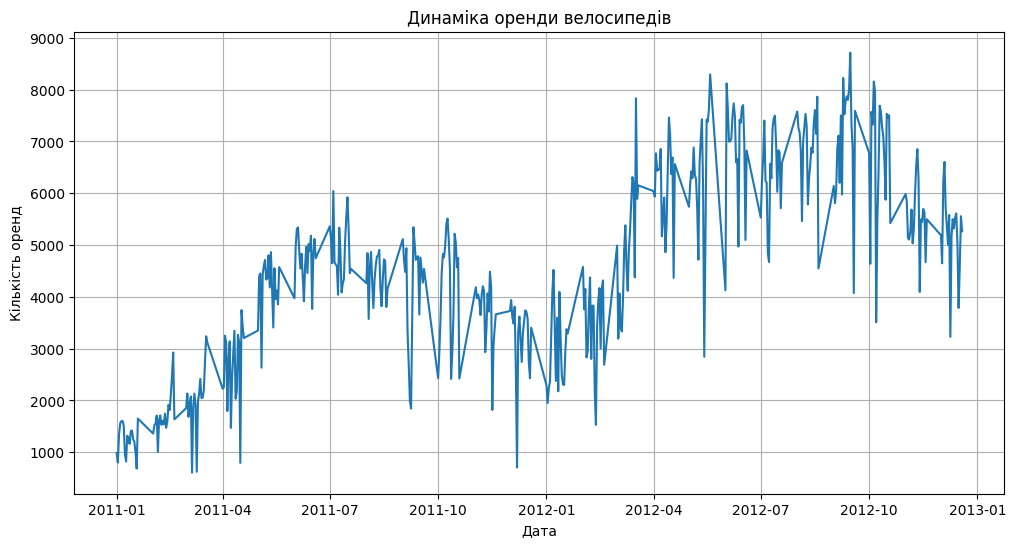

In [45]:
ax = daily_counts.plot(
    figsize=(12, 6),
    title='Динаміка оренди велосипедів',
    grid=True
)
ax.set_xlabel('Дата')
ax.set_ylabel('Кількість оренд');

***Як гадаєте, чому графік має "заломи", чим це спричинено і як ви б могли прибрати заломи?***
Є періоди з різкими піками, що може бути спричинено святковими подіями та святами. Тобто, аномально високі дні - у вихідні та святкові дні, низькі - в несезон або під час негоди. Заломи можна прибрати шляхом зглажування (використати, наприклад, середнє за 7 днів), а також агрегувати дані за тижнями або місяцями
***Які загальні тенденції ви бачите на графіку?***
 Бачу зростаючий тренд. Від початку 2011 року до середини 2012 спостерігається зростання кількості оренд, особливо яскраве у літній сезон.
***Чи помітні якісь сезонні коливання?***
Динаміка оренди має чітку сезонність: взимку спостерігається спад, а влітку та восени підйом.
***Чи є періоди з аномально високими або низькими значеннями і чому на ваш погляд можуть бути ці аномалії?*** Різкі “провали” вниз можуть співпадати зі святами, вихідними з поганою погодою, або технічними збоями в сервісі/системі збору даних. В той час як аномальні високу значення можуть співпадати з масовими заходами, святами, чи акціями сервісу (наприклад, день безкоштовних поїздок, фестивалі). Для детальнішого аналізу можна було б накласти погодні дані або подивитись, на які саме дати мають екстремальні значення.


## Завдання 2: Аналіз сезонності (Bar Plot)

**Завдання:**
Побудуйте вертикальну стовпчасту діаграму середньої кількості орендованих велосипедів за сезонами. Додайте підписи осей і заголовок.

Просунуте доповнення:
1. Позначте сезони не числом, а назвою на візуалізації.
2. Додайте підписи над стовпцями зі значеннями в кожному стовпці.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В який сезон найбільша середня кількість оренди велосипедів?
2. Як ви можете пояснити таку сезонну закономірність?
3. У скільки разів відрізняється оренда між найпопулярнішим та найменш популярним сезоном?

In [15]:
season_map = {1: 'Весна', 2: 'Літо', 3: 'Осінь', 4: 'Зима'}
df['season_name'] = df['season'].map(season_map)

In [16]:
season_avg = df.groupby('season_name')['count'].mean().reindex(['Весна', 'Літо', 'Осінь', 'Зима'])

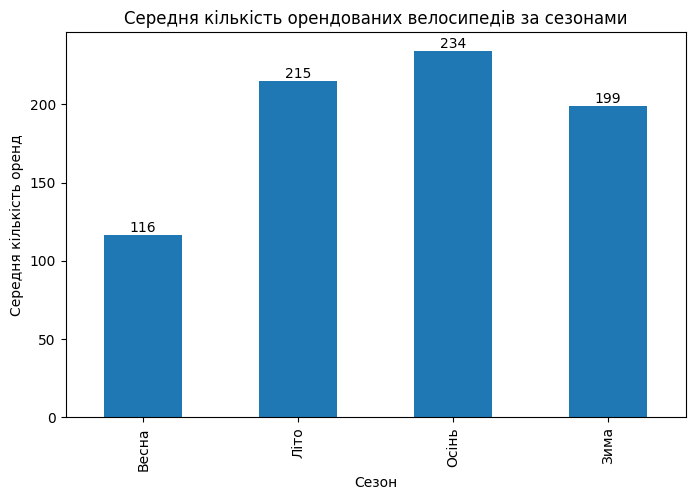

In [22]:
ax = season_avg.plot(kind='bar', figsize=(8, 5), legend=False, ylabel='Середня кількість оренд')

ax.set_xlabel('Сезон')
ax.set_title('Середня кількість орендованих велосипедів за сезонами')

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f');

***В який сезон найбільша середня кількість оренди велосипедів?*** Восени - 234 оренди, трохи менше влітку - 215.
***Як ви можете пояснити таку сезонну закономірність?***Погодними умовами влітку та восени, сприятливими для пересування велосипедом.
***У скільки разів відрізняється оренда між найпопулярнішим та найменш популярним сезоном?*** Різниця майже у два рази(234 проти 116).

## Завдання 3: Динаміка за місяцями (Line Plot)

**Завдання:**
Створіть лінійний графік середньої кількості оренди велосипедів по місяцях (тобто групування в рамках місяця і беремо середню кількість оренд в цей місяць з кількох років). Використайте маркери-кружечки для точок, додайте сітку та пофарбуйте лінію у червоний колір.

Просунуте доповнення:
- додайте аби по осі ОХ поділки були чітко на кожен окремий місяць по одній. Тобто сумарно 12 поділок.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В які місяці спостерігається пік та спад оренди?
2. Чи збігається ця закономірність з результатами з попереднього завдання?
3. Як може вплинути клімат на оренду велосипедів протягом року?


In [24]:
ukr_months = {
    1: 'Січень', 2: 'Лютий', 3: 'Березень', 4: 'Квітень', 5: 'Травень', 6: 'Червень',
    7: 'Липень', 8: 'Серпень', 9: 'Вересень', 10: 'Жовтень', 11: 'Листопад', 12: 'Грудень'
}
df['month_name'] = df['month'].map(ukr_months)
monthly_avg = df.groupby('month_name')['count'].mean().reindex([ukr_months[i] for i in range(1, 13)])

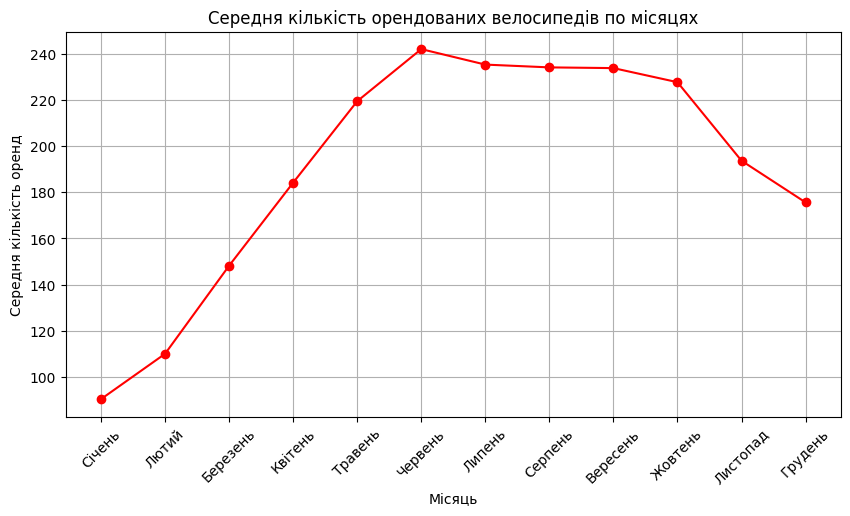

In [26]:
ax = monthly_avg.plot(
    kind='line',
    marker='o',
    color='red',
    figsize=(10, 5),
    grid=True,
    ylabel='Середня кількість оренд'
)

ax.set_xlabel('Місяць')
ax.set_title('Середня кількість орендованих велосипедів по місяцях')
ax.set_xticks(range(12))
ax.set_xticklabels([ukr_months[i] for i in range(1, 13)], rotation=45);


***В які місяці спостерігається пік та спад оренди?*** Пік - червень, липень, серпень, вересень. Спад - листопад, грудень, січень, лютий.
***Чи збігається ця закономірність з результатами з попереднього завдання?*** Так, тренд на сезонність збігається.
***Як може вплинути клімат на оренду велосипедів протягом року?*** Як позитивно, так і негативно. У літньо-осінній сезон попит на аренду зростає, у зимній - зменшується. У непогожі дні також спостерігаємо зниження кількості аренд.  

## Завдання 4: Розподіл погодних умов (Pie Chart)

**Завдання:**
1. Побудуйте кругову діаграму з часткою записів за погодними умовами
2. Додайте підписи з відсотками та легенду з описами погоди (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ).
3. Визначте свої відмінні від стандартних кольори для відображення кожної категорії.
4. Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. Яка погода переважає в датасеті?
2. Чи є дні із сильним дощем? Яка їх частка?
3. Як ви думаєте, як погодні умови впливають на попит на оренду велосипедів?

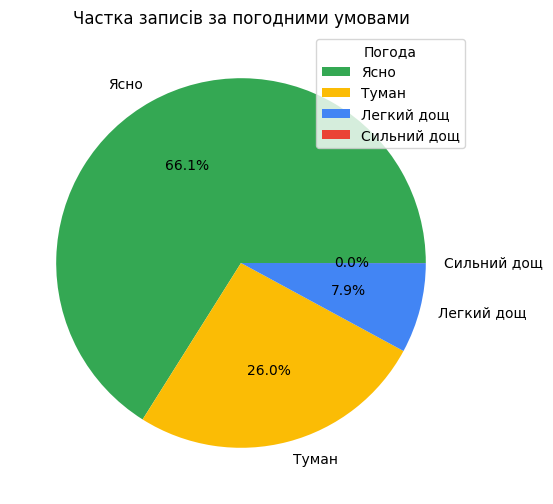

In [28]:
weather_map = {
    1: 'Ясно',
    2: 'Туман',
    3: 'Легкий дощ',
    4: 'Сильний дощ'
}
df['weather_desc'] = df['weather'].map(weather_map)
custom_colors = ['#34a853', '#fbbc05', '#4285f4', '#ea4335']
weather_counts = df['weather_desc'].value_counts().reindex(['Ясно', 'Туман', 'Легкий дощ', 'Сильний дощ'])
ax = weather_counts.plot(
    kind='pie',
    autopct='%.1f%%',
    colors=custom_colors,
    legend=True,
    figsize=(6, 6),
    ylabel=''  # Прибирає стандартний підпис y
)

ax.set_title('Частка записів за погодними умовами')
ax.legend(title="Погода", loc='best');

***Яка погода переважає в датасеті?***Переважає ясна сонячна погода - 66,1%
***Чи є дні із сильним дощем? Яка їх частка?***Майже немає, частка менше 0.01%
***Як ви думаєте, як погодні умови впливають на попит на оренду велосипедів?*** У сонячні, сухі та ясні, коли дорожні умови хороші та поїздка велосипедом є доречною та приємною. У той час як за мокрої та дощової погоди такі умови є менш сприятливими та більш зручніше користуватися авто, громадським транспортом.

Очікуваний результат:

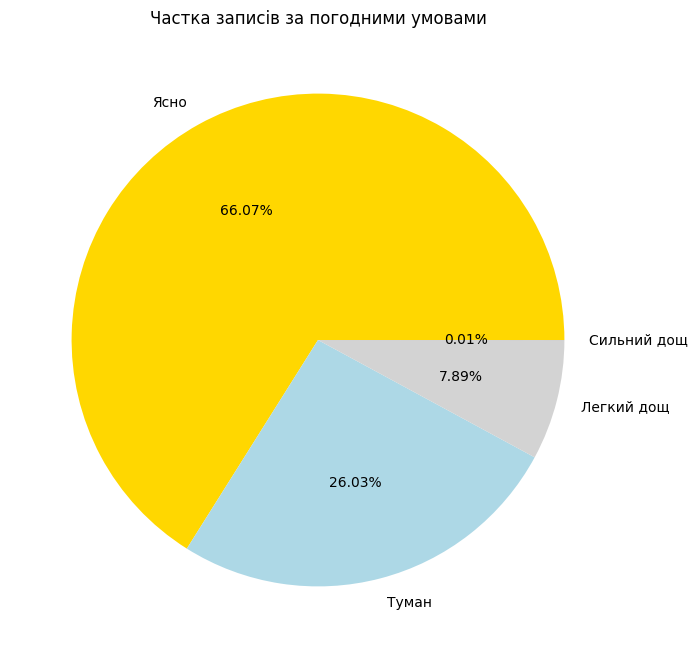

## Завдання 5: Box Plot для аналізу викидів

**Завдання:**
Створіть коробковий графік (box plot) кількості орендованих велосипедів для кожного типу погоди.

Просунуте доповнення:
- Використайте горизонтальну орієнтацію.
- Позначте погодні умови не числом, а назвою на візуалізації.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. При якій погоді найбільший розкид у кількості оренди?
2. Чи є викиди (outliers) в даних? При якій погоді?
3. При якій погоді медіанне значення оренди найвище?

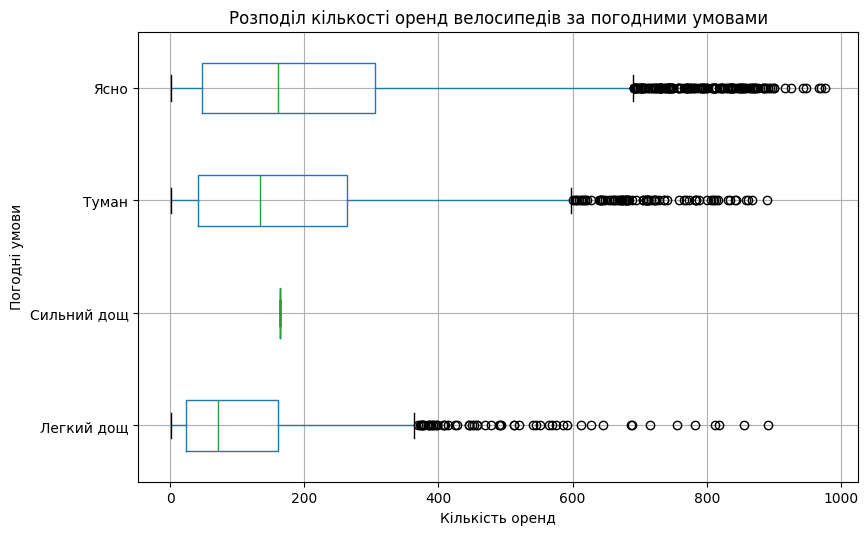

In [30]:
ax = df.boxplot(
    column='count',
    by='weather_desc',
    vert=False,           # горизонтальний plot
    figsize=(9, 6),
    grid=True
)

ax.set_xlabel('Кількість оренд')
ax.set_ylabel('Погодні умови')
ax.set_title('Розподіл кількості оренд велосипедів за погодними умовами')
plt.suptitle('');

***При якій погоді найбільший розкид у кількості оренди?*** Ясно
***Чи є викиди (outliers) в даних? При якій погоді?***Так, ясно, туман, легкий дощ
***При якій погоді медіанне значення оренди найвище?*** При ясній

## Завдання 6: Кореляція температури та оренди (Scatter Plot)

**Завдання:**
Побудуйте діаграму розсіювання залежності між температурою (`temp`) та загальною кількістю оренди (`count`). Розфарбуйте точки за сезонами, додайте напівпрозорість (alpha=0.6).

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
- Чи є зв'язок між температурою та кількістю оренди? Який?

In [32]:
season_colors = {
    'Весна': '#47b39c',
    'Літо': '#f9a602',
    'Осінь': '#d1495b',
    'Зима': '#9eebcf'
}
df['color'] = df['season_name'].map(season_colors)

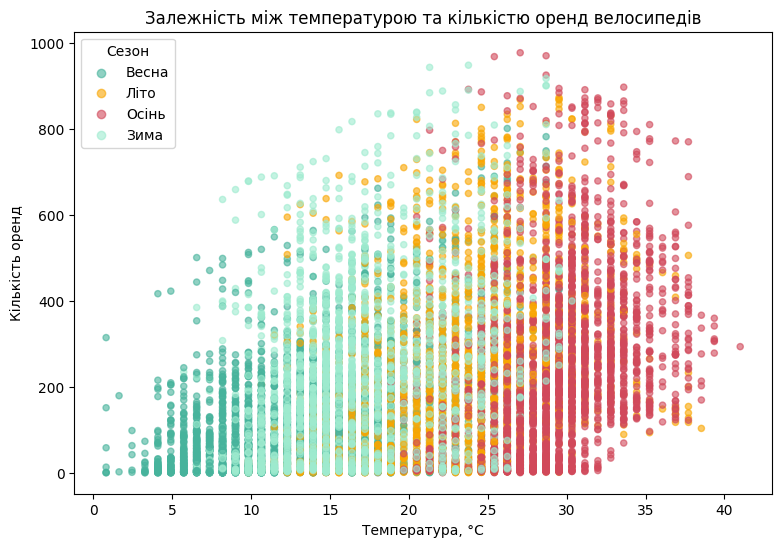

In [34]:
ax = df.plot(
    kind='scatter',
    x='temp',
    y='count',
    c=df['color'],
    alpha=0.6,
    figsize=(9, 6)
)

ax.set_xlabel('Температура, °C')
ax.set_ylabel('Кількість оренд')
ax.set_title('Залежність між температурою та кількістю оренд велосипедів')

for season, color in season_colors.items():
    ax.scatter([], [], c=color, alpha=0.6, label=season)
ax.legend(title='Сезон');

***Чи є зв'язок між температурою та кількістю оренди? Який?***Безумовно, кількість оренд найбільша при діапазоні температур від 20 до 28 градусів. Тобто, чітко помітний позитивний зв’язок: зі зростанням температури кількість оренд зростає до температури 28 градусів. За температури понад 30°C кількість оренд вже не зростає, а навіть трохи падає - надто спекотно для поїздок.

## Завдання 7: Порівняння користувачів (Stacked Bar Chart)

**Завдання:**
Ми хочемо дізнатись як по дням тижня беруть в середньому в оренду велосипеди випадкові і зареєстровані користувачі.

Створіть стовпчасту діаграму з накопиченням (bar з налаштуванням `stacked=True`), яка показує співвідношення випадкових (`casual`) та зареєстрованих (`registered`) користувачів по днях тижня за кількістю взятих ними велосипедів в оренду в середньому. Використайте різні кольори для типів користувачів.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В які дні тижня більше оренд від зареєстрованих користувачів?
2. Як ви можете пояснити таку різницю в поведінці користувачів протягом тижня?

In [40]:
df['weekday_name'] = df.index.day_name()
day_map = {
    'Monday': 'Понеділок',
    'Tuesday': 'Вівторок',
    'Wednesday': 'Середа',
    'Thursday': 'Четвер',
    'Friday': 'Пʼятниця',
    'Saturday': 'Субота',
    'Sunday': 'Неділя'
}
df['weekday_name_ukr'] = df['weekday_name'].map(day_map)
weekdays_order = [
    'Понеділок', 'Вівторок', 'Середа', 'Четвер', 'Пʼятниця', 'Субота', 'Неділя'
]

In [41]:
weekly_avg = df.groupby('weekday_name_ukr')[['casual', 'registered']].mean().reindex(weekdays_order)

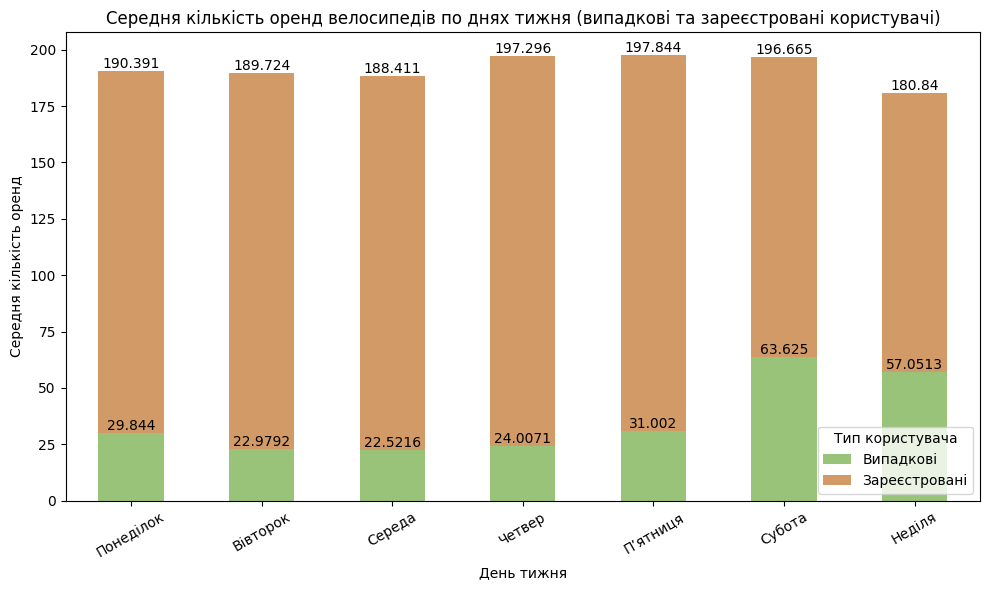

In [43]:
ax = weekly_avg.plot(
    kind='bar',
    stacked=True,
    color=['#98c379', '#d19a66'],
    figsize=(10, 6),
    ylabel='Середня кількість оренд'
)

ax.set_xlabel('День тижня')
ax.set_title('Середня кількість оренд велосипедів по днях тижня (випадкові та зареєстровані користувачі)')
ax.legend(['Випадкові', 'Зареєстровані'], title='Тип користувача')
plt.xticks(rotation=30)
plt.tight_layout()

for bars in ax.containers:
    ax.bar_label(bars)

***В які дні тижня більше оренд від зареєстрованих користувачів?*** В основному робочі дні - вівторок, четвер, пятниця.
***Як ви можете пояснити таку різницю в поведінці користувачів протягом тижня?***На мій погляд, в робочі дні зареєстровані користувачі активно беруть в оренду велосипед для робочих потреб та прогулянок після роботи на постійній регулярній основі, в той час як на вихідних більша частка випадкових користувачів, оскільки ця група користувачів характеризується більшою схильністю до спонтанних поїздок та прогулянок, а частка зареєстрованих відповідно падає, бо наявного велосипедного парку всім не вистачає.